In [1]:
## from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
it1 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\iteration files\it1.csv',index_col=0)

In [5]:
it1.head()

,log_GrLivArea,has_pool,log_LotArea,log_MasVnrArea,bc_LotArea,yeo_TotalBsmtSF,yeo_GarageArea,yeo_WoodDeckSF,yeo_OpenPorchSF,log_price
0,7.444249,False,9.041922,5.283204,10.433680,198.284295,204.517915,-0.000000,4.227899,12.247694
1,7.140453,False,9.169518,0.000000,10.602809,264.601145,177.329636,4.594581,0.000000,12.109011
2,7.487734,False,9.328123,5.093750,10.813973,209.206786,222.579733,-0.000000,3.844769,12.317167
3,7.448334,False,9.164296,0.000000,10.595874,180.779930,232.664362,-0.000000,3.659326,11.849398
4,7.695303,False,9.565214,5.860786,11.131570,246.150776,288.451992,4.310041,4.559556,12.429216


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
# on attaining buddhahood in this lifetime
it1.columns

Index(['log_GrLivArea', 'has_pool', 'log_LotArea', 'log_MasVnrArea',
       'bc_LotArea', 'yeo_TotalBsmtSF', 'yeo_GarageArea', 'yeo_WoodDeckSF',
       'yeo_OpenPorchSF', 'log_price'],
      dtype='object')

In [8]:
lasso_it1 = ['log_GrLivArea', 'log_LotArea','log_MasVnrArea', 'bc_LotArea', 'yeo_TotalBsmtSF', 'yeo_GarageArea','yeo_WoodDeckSF', 'yeo_OpenPorchSF']

# lasso_it1= it1[lasso_it1]

log_price = it1['log_price']

In [9]:
ss = StandardScaler()
X = ss.fit_transform(it1[lasso_it1])

In [10]:
lasso = Lasso(max_iter=3000)

In [11]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
gs = GridSearchCV(lasso, params, cv=5, return_train_score=True, refit=True)

In [12]:
gs.fit(X,log_price)
gs.best_params_

{'alpha': 0.001}

In [13]:
gs.score(X,log_price)

0.7402846709901738

In [14]:
X.shape

(1460, 8)

In [15]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

adj_r2 = 1-(1-gs.score(X,log_price))*(X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
adj_r2

0.7388527463643443

In [16]:
lasso_pred = gs.best_estimator_.predict(X)
print('RMSE: ' + str(mean_squared_error(lasso_pred,log_price)**0.5))

RMSE: 0.20350002481057688


In [17]:
residuals = log_price - lasso_pred

In [18]:
import scipy
scipy.stats.skew(residuals)

-1.7036682889828907

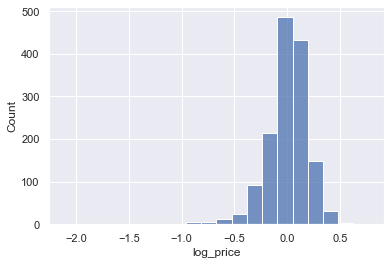

In [19]:
sns.set_theme(style='darkgrid')
sns.histplot(residuals, bins=20);

In [20]:
coefs = list(gs.best_estimator_.coef_)
coefs

[0.16165347190976712,
 0.021276734069581263,
 0.03029291938270315,
 0.0,
 0.09098678769681486,
 0.09781443815919923,
 0.04463718686947238,
 0.04574362898884545]

In [21]:
sorted(list(zip(lasso_it1,coefs)),reverse=True, key=lambda x: x[1])

[('log_GrLivArea', 0.16165347190976712),
 ('yeo_GarageArea', 0.09781443815919923),
 ('yeo_TotalBsmtSF', 0.09098678769681486),
 ('yeo_OpenPorchSF', 0.04574362898884545),
 ('yeo_WoodDeckSF', 0.04463718686947238),
 ('log_MasVnrArea', 0.03029291938270315),
 ('log_LotArea', 0.021276734069581263),
 ('bc_LotArea', 0.0)]

# iteration 2

In [53]:
it2 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\iteration files\it2.csv')

In [54]:
#lasso_it2 = [x != 'log_price' for x in it2.columns]
lasso_it2 = list(filter(lambda x: x != 'log_price', it2.columns))
lasso_it2                 

['Unnamed: 0',
 'log_GrLivArea',
 'log_LotArea',
 'log_MasVnrArea',
 'bc_LotArea',
 'yeo_TotalBsmtSF',
 'yeo_GarageArea',
 'log_WoodDeckSF',
 'log_OpenPorchSF',
 'log_first_FlrSF',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces']

In [56]:
ss = StandardScaler()
X = ss.fit_transform(it2[lasso_it2])


In [25]:
def lasso_reg(df=None, varlist=None, y=None, gs=None, m_iter=None, model=None):
    
    ss = StandardScaler()
    X = ss.fit_transform(df[varlist])

    y_hat = y
    
    model = Lasso(max_iter = m_iter)
    
    params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    gs = GridSearchCV(lasso, params, cv=5, return_train_score=True, refit=True)

    gs.fit(X, y_hat)
    
    return gs
    
    
    

In [57]:
lasso2 = Lasso(max_iter=15000)

In [58]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
gs2 = GridSearchCV(lasso2, params, cv=5, return_train_score=True, refit=True)


In [59]:
gs2.fit(X,log_price)
gs2.best_params_


{'alpha': 0.001}

In [60]:
gs2.score(X,log_price)

0.8774691246337702

In [61]:
lasso_pred = gs2.best_estimator_.predict(X)
print('RMSE: ' + str(mean_squared_error(lasso_pred,log_price)**0.5))


RMSE: 0.1397778779303385


In [62]:
residuals = log_price - lasso_pred


In [63]:
lasso_pred_real_dollars = np.exp(lasso_pred)
price_real_dollars = np.exp(log_price)

print('RMSE: ' + str(mean_squared_error(lasso_pred_real_dollars,price_real_dollars)**0.5))

RMSE: 37031.44883752671


In [64]:
scipy.stats.skew(residuals)

-2.7747496671142025

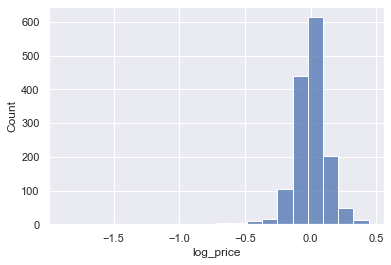

In [65]:
sns.set_theme(style='darkgrid')
sns.histplot(residuals, bins=20);

In [67]:
coefs2 = list(gs2.best_estimator_.coef_)
coefs2

[-0.0015348294749545084,
 0.11064593509736563,
 0.04317920155091236,
 -0.0,
 0.0,
 0.02451720536764365,
 0.03627529900171721,
 0.006149015535818426,
 0.0,
 0.027095765886379127,
 0.1124831719788834,
 0.05550987356746189,
 0.008292932394501842,
 0.0879899197613156,
 0.021352533261457918,
 0.026632563719270835,
 0.0021467362719487246,
 0.0161635690100097,
 0.01154389820296116,
 -0.008558267311957255,
 -0.01976068127606827,
 0.00954129505340381,
 0.022769574316812802]

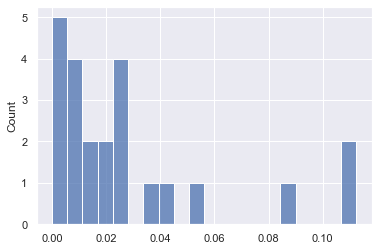

In [68]:
sns.set_theme(style='darkgrid')
sns.histplot(np.absolute(coefs2), bins=20);

In [69]:
list(zip(lasso_it2,coefs2))

[('Unnamed: 0', -0.0015348294749545084),
 ('log_GrLivArea', 0.11064593509736563),
 ('log_LotArea', 0.04317920155091236),
 ('log_MasVnrArea', -0.0),
 ('bc_LotArea', 0.0),
 ('yeo_TotalBsmtSF', 0.02451720536764365),
 ('yeo_GarageArea', 0.03627529900171721),
 ('log_WoodDeckSF', 0.006149015535818426),
 ('log_OpenPorchSF', 0.0),
 ('log_first_FlrSF', 0.027095765886379127),
 ('OverallQual', 0.1124831719788834),
 ('OverallCond', 0.05550987356746189),
 ('BsmtFinSF1', 0.008292932394501842),
 ('YearBuilt', 0.0879899197613156),
 ('YearRemodAdd', 0.021352533261457918),
 ('BsmtFullBath', 0.026632563719270835),
 ('BsmtHalfBath', 0.0021467362719487246),
 ('FullBath', 0.0161635690100097),
 ('HalfBath', 0.01154389820296116),
 ('BedroomAbvGr', -0.008558267311957255),
 ('KitchenAbvGr', -0.01976068127606827),
 ('TotRmsAbvGrd', 0.00954129505340381),
 ('Fireplaces', 0.022769574316812802)]

In [70]:
sorted(list(zip(lasso_it2,coefs2)),reverse=True, key=lambda x: x[1])

[('OverallQual', 0.1124831719788834),
 ('log_GrLivArea', 0.11064593509736563),
 ('YearBuilt', 0.0879899197613156),
 ('OverallCond', 0.05550987356746189),
 ('log_LotArea', 0.04317920155091236),
 ('yeo_GarageArea', 0.03627529900171721),
 ('log_first_FlrSF', 0.027095765886379127),
 ('BsmtFullBath', 0.026632563719270835),
 ('yeo_TotalBsmtSF', 0.02451720536764365),
 ('Fireplaces', 0.022769574316812802),
 ('YearRemodAdd', 0.021352533261457918),
 ('FullBath', 0.0161635690100097),
 ('HalfBath', 0.01154389820296116),
 ('TotRmsAbvGrd', 0.00954129505340381),
 ('BsmtFinSF1', 0.008292932394501842),
 ('log_WoodDeckSF', 0.006149015535818426),
 ('BsmtHalfBath', 0.0021467362719487246),
 ('log_MasVnrArea', -0.0),
 ('bc_LotArea', 0.0),
 ('log_OpenPorchSF', 0.0),
 ('Unnamed: 0', -0.0015348294749545084),
 ('BedroomAbvGr', -0.008558267311957255),
 ('KitchenAbvGr', -0.01976068127606827)]